In [133]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

smoothData = True
transmitterIDs = ['a', 'b', 'c']

def loadFiles(locationNumber):
  processedFiles = []
  for i in range(15):
    currentAngle = i * 2.5
    with open('/content/drive/MyDrive/transmitterprofile/loc' + str(locationNumber) + '-' + str(currentAngle) + '.log', 'r') as f:
      filedata = f.read()
      processedFiles.append(filedata)
  return processedFiles

def getAverages(files):
  averages = []
  for i in range(len(files)):
    splitFile = files[i][54:].split('\n\n')
    splitFile = splitFile[1:len(splitFile)-1]
    fileAverages = []
    for k in range(3):
      transmitterRSSIs = []
      for j in range(len(splitFile)):
        if splitFile[j][len(splitFile[j])-2] == transmitterIDs[k]:
          if(len(splitFile[j]) == 29):
            transmitterRSSIs.append(-int(splitFile[j][7:9]))
      averages.append(np.average(transmitterRSSIs))
  return np.reshape(averages,(15,3))

def mirrorData(array):
  return np.concatenate((np.flip(array, axis=0),array[1:]),axis=0)

def getAverageofTransmitter(averages,transmitter):
  transmitteravg = []
  for i in range(len(averages)):
    transmitteravg.append(averages[i][transmitter])
  if smoothData:
    return gaussian_filter1d(transmitteravg, sigma=2)
  return transmitteravg

def plotAverages(averages):
  angles = np.arange(-35,37.5,2.5)
  plt.plot(angles,getAverageofTransmitter(averages,0) ,color="red") # RSSI from transmitter A
  plt.plot(angles,getAverageofTransmitter(averages,1),color="green") # RSSI from transmitter B
  plt.plot(angles,getAverageofTransmitter(averages,2),color="blue") # RSSI from transmitter C

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<ipython-input-133-6f0d7a063581>:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


# LOCATION 1

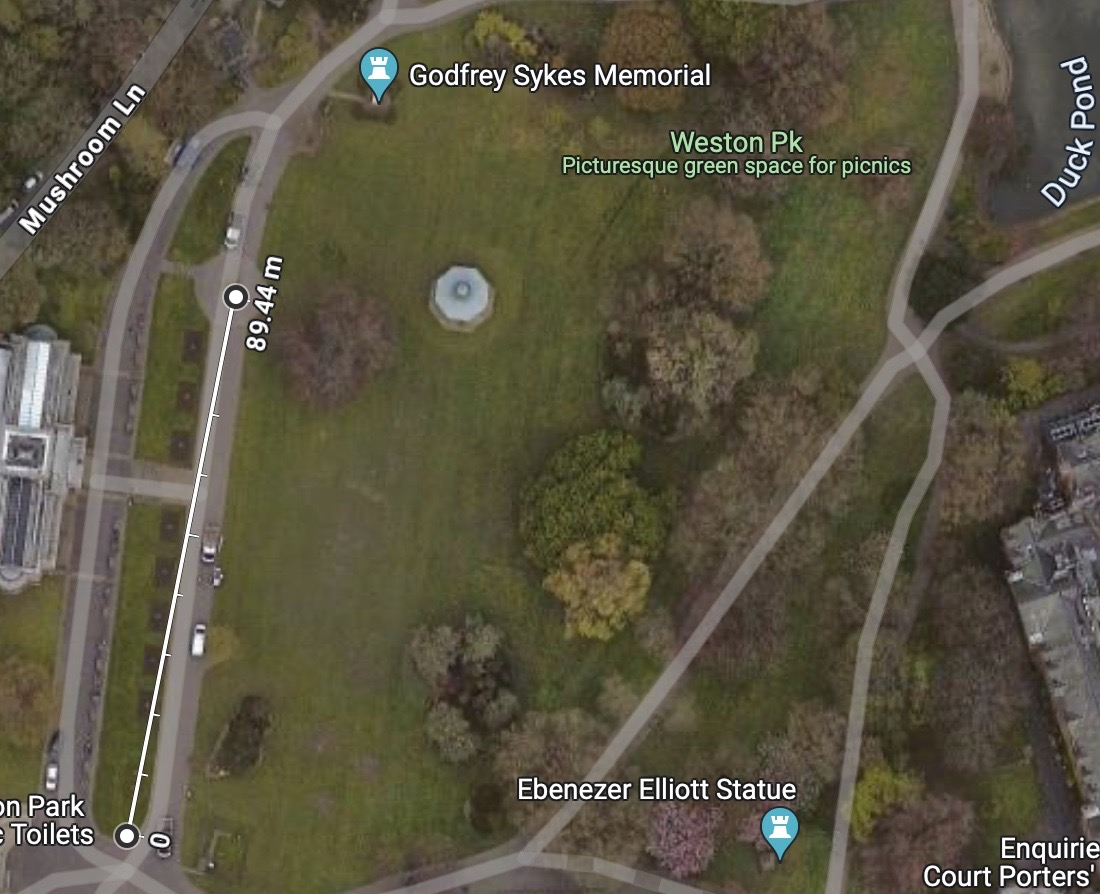

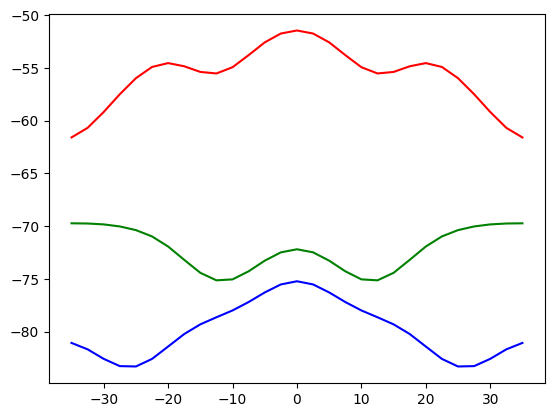

In [134]:
plotAverages(mirrorData(getAverages(loadFiles(1))))

# LOCATION 2

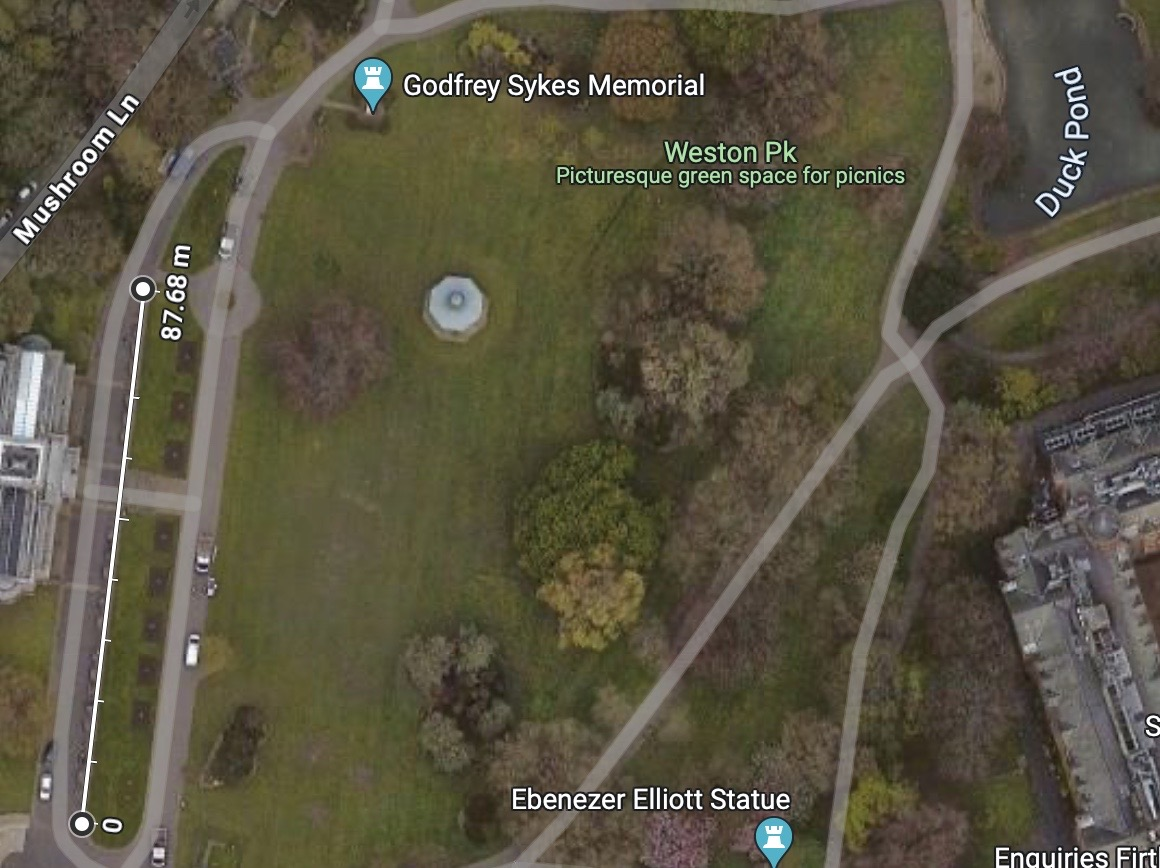

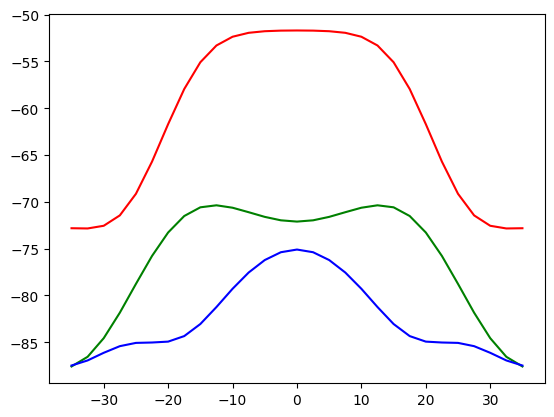

In [135]:
plotAverages(mirrorData(getAverages(loadFiles(2))))

# LOCATION 3

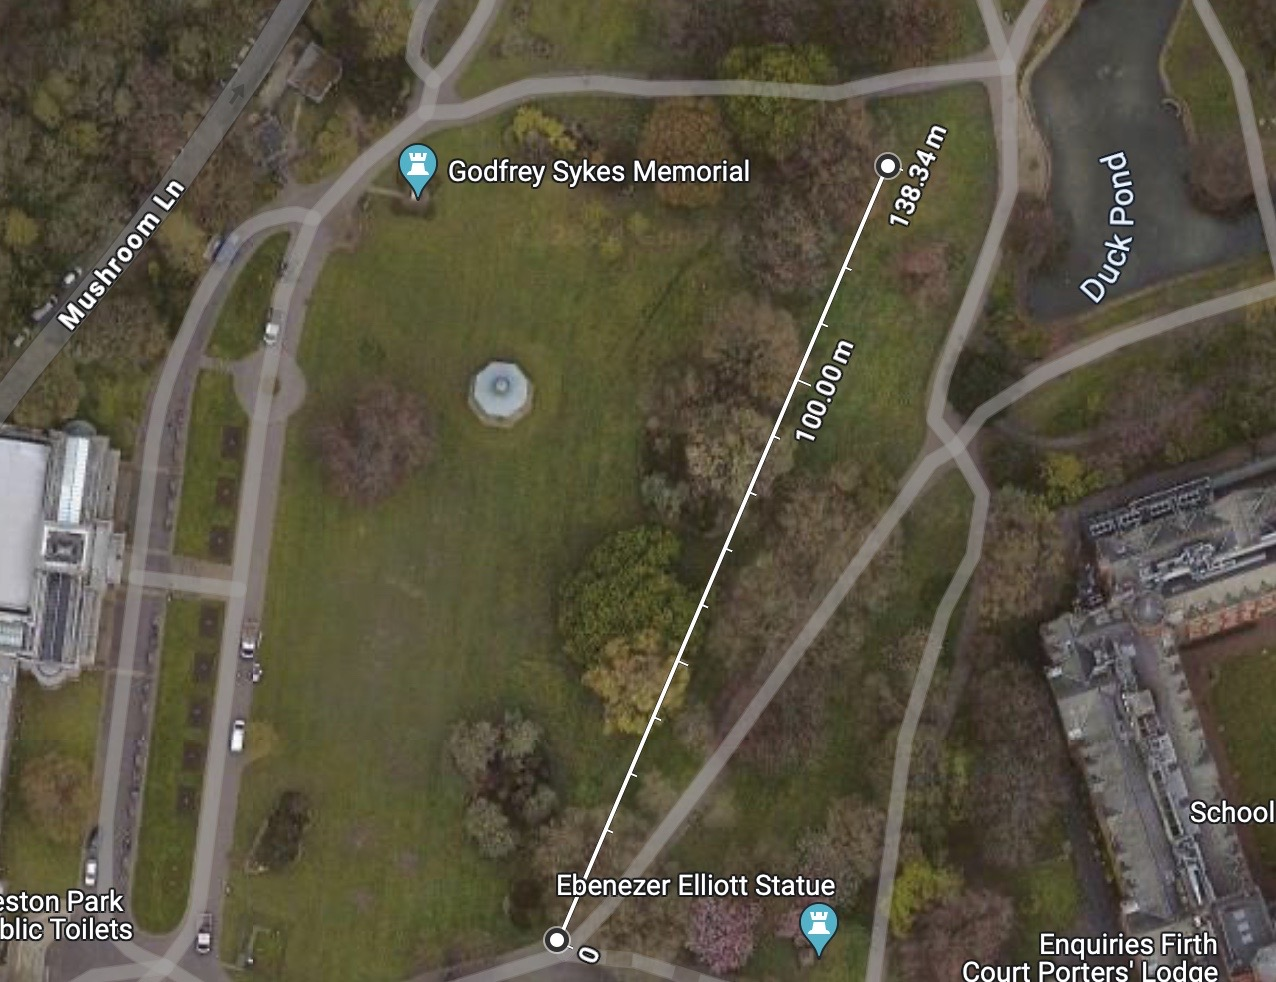

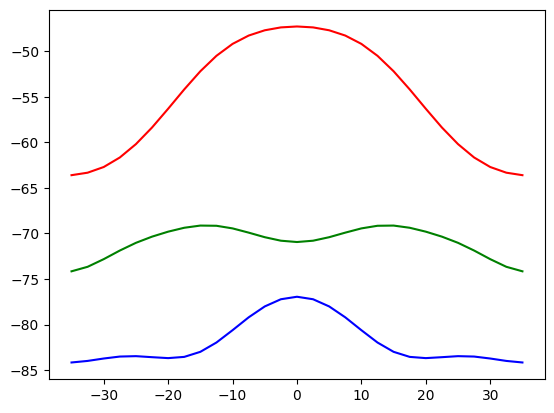

In [136]:
plotAverages(mirrorData(getAverages(loadFiles(3))))

# LOCATION 4

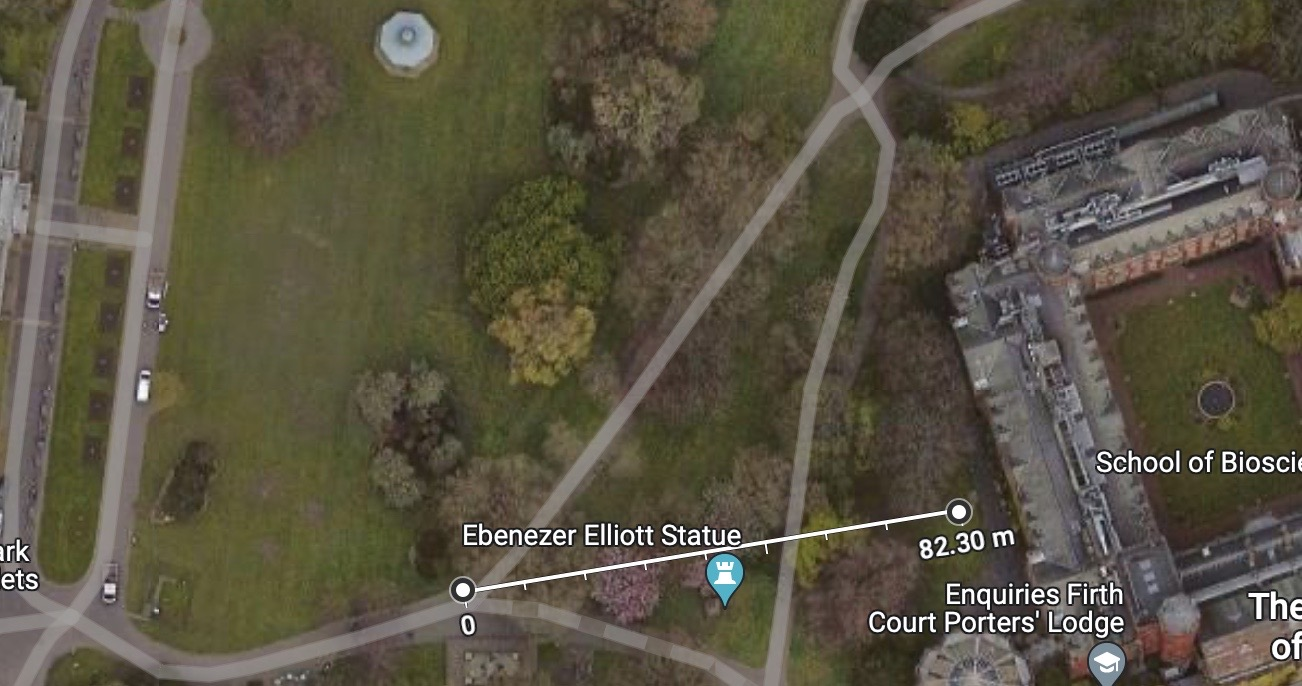

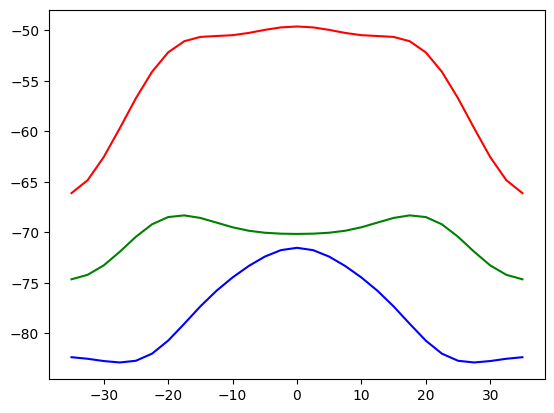

In [137]:
plotAverages(mirrorData(getAverages(loadFiles(4))))